<a href="https://colab.research.google.com/github/snu-digital-finance/ProductionML/blob/main/a_data_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Generation

- **Two dataset types**
  1. **K-intensive**
     - $K \sim U(0,1)$
     - $L = 0$
  2. **L-intensive**
     - $K = 0$
     - $L \sim U(0,1)$

- **Three target functions (each with noise)**
  1. $y = K^3 + \epsilon$
  2. $y = -K^3 + \epsilon$
  3. $y = L^3 + \epsilon$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# === 1. Data ===
np.random.seed(42)
tf.random.set_seed(42)

n = 1000
noise_scale = 0.05

# K-intensive: K~U(0,1), L=0
K = np.random.rand(n, 1)
L0 = np.zeros((n, 1))
X_K = np.hstack([K, L0])

# L-intensive: K=0, L~U(0,1)
K0 = np.zeros((n, 1))
L = np.random.rand(n, 1)
X_L = np.hstack([K0, L])

# Targets with noise
y1 = K**3 + np.random.normal(0, noise_scale, size=(n, 1))      # K³ + noise
y2 = -K**3 + np.random.normal(0, noise_scale, size=(n, 1))     # −K³ + noise
y3 = L**3 + np.random.normal(0, noise_scale, size=(n, 1))      # L³ + noise
y4 = -L**3 + np.random.normal(0, noise_scale, size=(n, 1))


### Data Visualization (y1, y2, y3)

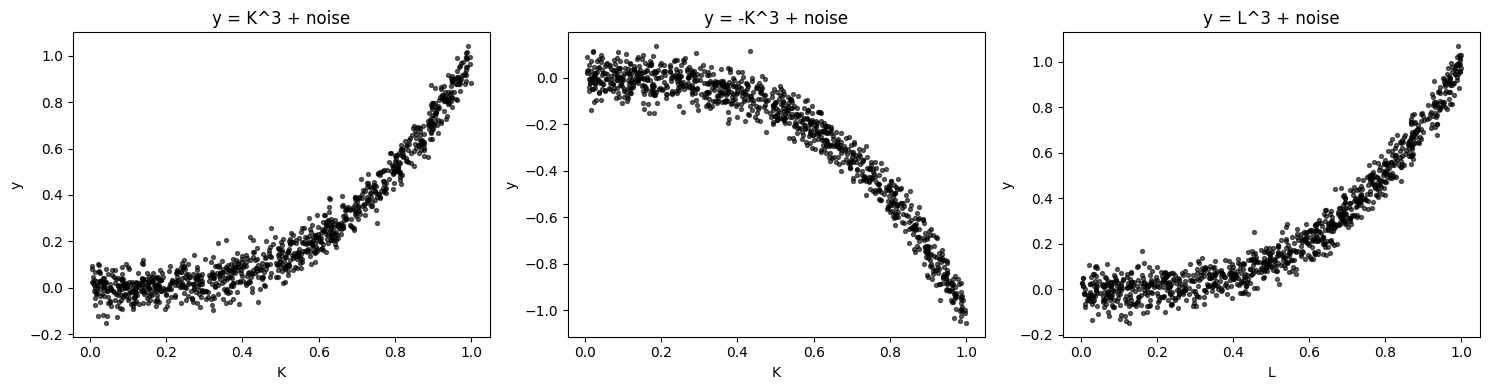

In [3]:
# ===== Visualization =====
fig, axs = plt.subplots(1, 3, figsize=(15,4))

# 1. y = K^3
axs[0].scatter(K, y1, color="black", s=8, alpha=0.6, label="K-Intensive")
axs[0].set_title("y = K^3 + noise")
axs[0].set_xlabel("K")
axs[0].set_ylabel("y")

# 2. y = -K^3
axs[1].scatter(K, y2, color="black", s=8, alpha=0.6, label="Inverted K-Intensive")
axs[1].set_title("y = -K^3 + noise")
axs[1].set_xlabel("K")
axs[1].set_ylabel("y")

# 3. y = L^3
axs[2].scatter(L, y3, color="black", s=8, alpha=0.6, label="L-Intensive")
axs[2].set_title("y = L^3 + noise")
axs[2].set_xlabel("L")
axs[2].set_ylabel("y")

plt.tight_layout()
plt.show()